In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns #statistical plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
movies_df=pd.read_csv('movies.dat', sep='::', names=['MovieID','Title','Genres'],header=None, encoding='latin-1')

In [3]:
users_df=pd.read_csv('users.dat', sep='::', names=['UserID','Gender','Age','Occupation','Zip-code'], header=None, encoding='latin-1')

In [4]:
ratings_df=pd.read_csv('ratings.dat', sep='::', names=['UserID','MovieID','Rating','Timestamp'], parse_dates=['Timestamp'], header=None, encoding='latin-1')

In [5]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [9]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [10]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [11]:
first_merge=pd.merge(movies_df,ratings_df,on='MovieID')
first_merge.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [12]:
second_merge=pd.merge(users_df,first_merge,on='UserID')
second_merge.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Title,Genres,Rating,Timestamp
0,1,F,1,10,48067,1,Toy Story (1995),Animation|Children's|Comedy,5,978824268
1,1,F,1,10,48067,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5,978824351
2,1,F,1,10,48067,150,Apollo 13 (1995),Drama,5,978301777
3,1,F,1,10,48067,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4,978300760
4,1,F,1,10,48067,527,Schindler's List (1993),Drama|War,5,978824195


In [13]:
second_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   Gender      1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   Zip-code    1000209 non-null  object
 5   MovieID     1000209 non-null  int64 
 6   Title       1000209 non-null  object
 7   Genres      1000209 non-null  object
 8   Rating      1000209 non-null  int64 
 9   Timestamp   1000209 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [14]:
master_data=second_merge.drop(['Zip-code','Timestamp'], axis=1)
master_data.head()

,UserID,Gender,Age,Occupation,MovieID,Title,Genres,Rating
0,1,F,1,10,1,Toy Story (1995),Animation|Children's|Comedy,5
1,1,F,1,10,48,Pocahontas (1995),Animation|Children's|Musical|Romance,5
2,1,F,1,10,150,Apollo 13 (1995),Drama,5
3,1,F,1,10,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4
4,1,F,1,10,527,Schindler's List (1993),Drama|War,5


In [15]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   Gender      1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   MovieID     1000209 non-null  int64 
 5   Title       1000209 non-null  object
 6   Genres      1000209 non-null  object
 7   Rating      1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


In [16]:
users_df['Age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

Text(0, 0.5, 'Count')

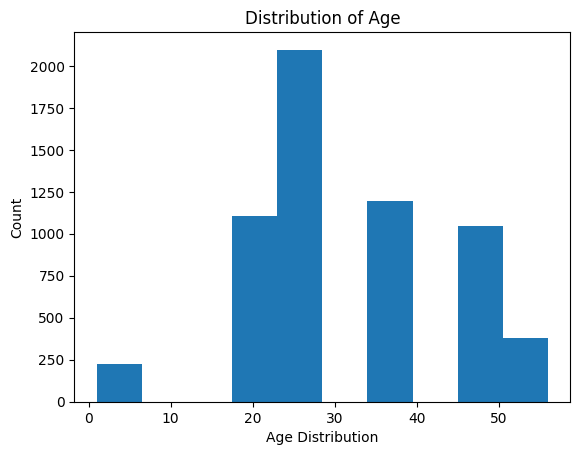

In [17]:
plt.hist(users_df['Age'])
plt.xlabel('Age Distribution')
plt.title('Distribution of Age')
plt.ylabel('Count')

In [18]:
#2.user rating of the movie Toy Story
first_merge.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [19]:
group=first_merge.groupby('Title')

In [20]:
toy_story=group.get_group('Toy Story (1995)')

In [21]:
toy_story.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


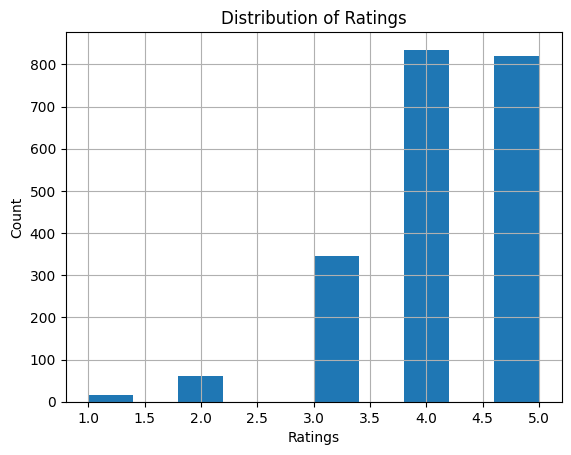

In [22]:
toy_story['Rating'].hist()
plt.xlabel('Ratings')
plt.title('Distribution of Ratings')
plt.ylabel('Count')
plt.show()

In [23]:
#3. "Top 25 movies by viewership rating"
averageRating=first_merge.groupby('Title')['Rating'].mean()

In [24]:
averageRating.head(2)

Title
$1,000,000 Duck (1971)    3.027027
'Night Mother (1986)      3.371429
Name: Rating, dtype: float64

In [25]:
#to find movies with highest ratings just sort to desc
averageRating=averageRating.sort_values(ascending=False)
averageRating.head(25)

Title
Gate of Heavenly Peace, The (1995)                                     5.000000
Lured (1947)                                                           5.000000
Ulysses (Ulisse) (1954)                                                5.000000
Smashing Time (1967)                                                   5.000000
Follow the Bitch (1998)                                                5.000000
Song of Freedom (1936)                                                 5.000000
Bittersweet Motel (2000)                                               5.000000
Baby, The (1973)                                                       5.000000
One Little Indian (1973)                                               5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

In [26]:
#4. Find the ratings for all the movies reviewed by for a particular
#user of user id=2696
ratingsAll2696=second_merge[second_merge['UserID']==2696]

In [27]:
ratingsAll2696

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Title,Genres,Rating,Timestamp
440667,2696,M,25,7,24210,350,"Client, The (1994)",Drama|Mystery|Thriller,3,973308886
440668,2696,M,25,7,24210,800,Lone Star (1996),Drama|Mystery,5,973308842
440669,2696,M,25,7,24210,1092,Basic Instinct (1992),Mystery|Thriller,4,973308886
440670,2696,M,25,7,24210,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,3,973308690
440671,2696,M,25,7,24210,1258,"Shining, The (1980)",Horror,4,973308710
440672,2696,M,25,7,24210,1270,Back to the Future (1985),Comedy|Sci-Fi,2,973308676
440673,2696,M,25,7,24210,1589,Cop Land (1997),Crime|Drama|Mystery,3,973308865
440674,2696,M,25,7,24210,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,4,973308842
440675,2696,M,25,7,24210,1625,"Game, The (1997)",Mystery|Thriller,4,973308842
440676,2696,M,25,7,24210,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2,973308920


In [28]:
#1.	Find out all the unique genres
#(Hint: split the data in column genre making a list
#and then process the data to find out
#only the unique categories of genres)
first_merge['Genres'].value_counts().head(10)

Comedy                     116883
Drama                      111423
Comedy|Romance              42712
Comedy|Drama                42245
Drama|Romance               29170
Action|Thriller             26759
Horror                      22563
Drama|Thriller              18248
Thriller                    17851
Action|Adventure|Sci-Fi     17783
Name: Genres, dtype: int64

In [29]:
first_merge['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

In [30]:
#2.	Create a separate column for each genre category with a
#one-hot encoding ( 1 and 0)
#whether or not the movie belongs to that genre.
genrecol=first_merge['Genres']
genre=genrecol.str.get_dummies().add_prefix('NEW')

In [31]:
genre.head()

,NEWAction,NEWAdventure,NEWAnimation,NEWChildren's,NEWComedy,NEWCrime,NEWDocumentary,NEWDrama,NEWFantasy,NEWFilm-Noir,NEWHorror,NEWMusical,NEWMystery,NEWRomance,NEWSci-Fi,NEWThriller,NEWWar,NEWWestern
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
genrecol.head()

0    Animation|Children's|Comedy
1    Animation|Children's|Comedy
2    Animation|Children's|Comedy
3    Animation|Children's|Comedy
4    Animation|Children's|Comedy
Name: Genres, dtype: object

In [33]:
final_data=pd.concat([first_merge,genre],axis=1)

In [34]:
final_data.head(5)

,MovieID,Title,Genres,UserID,Rating,Timestamp,NEWAction,NEWAdventure,NEWAnimation,NEWChildren's,...,NEWFantasy,NEWFilm-Noir,NEWHorror,NEWMusical,NEWMystery,NEWRomance,NEWSci-Fi,NEWThriller,NEWWar,NEWWestern
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 24 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   MovieID         1000209 non-null  int64 
 1   Title           1000209 non-null  object
 2   Genres          1000209 non-null  object
 3   UserID          1000209 non-null  int64 
 4   Rating          1000209 non-null  int64 
 5   Timestamp       1000209 non-null  int64 
 6   NEWAction       1000209 non-null  int64 
 7   NEWAdventure    1000209 non-null  int64 
 8   NEWAnimation    1000209 non-null  int64 
 9   NEWChildren's   1000209 non-null  int64 
 10  NEWComedy       1000209 non-null  int64 
 11  NEWCrime        1000209 non-null  int64 
 12  NEWDocumentary  1000209 non-null  int64 
 13  NEWDrama        1000209 non-null  int64 
 14  NEWFantasy      1000209 non-null  int64 
 15  NEWFilm-Noir    1000209 non-null  int64 
 16  NEWHorror       1000209 non-null  int64 
 17  NEWMusic

In [36]:
final_data.to_csv('final_data.csv')

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [38]:
X=final_data.drop(['Rating','Title','Genres','Timestamp','MovieID','UserID'],axis=1)
y=final_data['Rating']

In [39]:
X.columns

Index(['NEWAction', 'NEWAdventure', 'NEWAnimation', 'NEWChildren's',
       'NEWComedy', 'NEWCrime', 'NEWDocumentary', 'NEWDrama', 'NEWFantasy',
       'NEWFilm-Noir', 'NEWHorror', 'NEWMusical', 'NEWMystery', 'NEWRomance',
       'NEWSci-Fi', 'NEWThriller', 'NEWWar', 'NEWWestern'],
      dtype='object')

In [40]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [41]:
linear_reg=LinearRegression()

In [42]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [43]:
#Predictions
y_pred=linear_reg.predict(X_test)

In [44]:
#to find the most important features
linear_reg.coef_

array([-0.10259894,  0.01484072,  0.36292453, -0.3215857 , -0.01624118,
        0.09633733,  0.40940027,  0.23650902,  0.06420402,  0.4467839 ,
       -0.28896811,  0.16319447,  0.01412358, -0.00614819, -0.02582426,
        0.05733083,  0.29962257,  0.12561833])

In [45]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

0.03663219284398456


In [46]:
data=pd.DataFrame(master_data)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   UserID      1000209 non-null  int64 
 1   Gender      1000209 non-null  object
 2   Age         1000209 non-null  int64 
 3   Occupation  1000209 non-null  int64 
 4   MovieID     1000209 non-null  int64 
 5   Title       1000209 non-null  object
 6   Genres      1000209 non-null  object
 7   Rating      1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


In [48]:
print(data.corr()) #pearson correlation coeficient

              UserID       Age  Occupation   MovieID    Rating
UserID      1.000000  0.034688   -0.026698 -0.017739  0.012303
Age         0.034688  1.000000    0.078371  0.027575  0.056869
Occupation -0.026698  0.078371    1.000000  0.008585  0.006753
MovieID    -0.017739  0.027575    0.008585  1.000000 -0.064042
Rating      0.012303  0.056869    0.006753 -0.064042  1.000000
